# Dimensionality Reduction
***
Compares the Dimensionality Reduction capabilities of PCA and Autoencoders
***
### Import Packages

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd

***
### Helper Functions

In [2]:
def housing_encoder(data_matrix, n_dim, epochs=50, batch_size=128):

    input_dim = len(df.columns)

    encoder_inputs_1 = Input(shape=(input_dim,), name='Input')

    hidden_1_1 = Dense(200, activation='linear', name='1st_Hidden')(encoder_inputs_1)
    hidden_1_2 = Dense(150, activation='linear', name='2nd_Hidden')(hidden_1_1)
    hidden_1_3 = Dense(100, activation='linear', name='3rd_Hidden')(hidden_1_2)
    hidden_1_4 = Dense(50, activation='linear', name='4th_Hidden')(hidden_1_3)
    hidden_1_5 = Dense(20, activation='linear', name='5th_Hidden')(hidden_1_4)
    
    output_encoded_1 = Dense(2, activation='sigmoid', name='Output_Encoded')(hidden_1_5)
    
    hidden_1_6 = Dense(20, activation='linear', name='6th_Hidden')(output_encoded_1)
    hidden_1_7 = Dense(50, activation='linear', name='7th_Hidden')(hidden_1_6)
    hidden_1_8 = Dense(100, activation='linear', name='8th_Hidden')(hidden_1_7)
    hidden_1_9 = Dense(150, activation='linear', name='9th_Hidden')(hidden_1_8)
    hidden_1_10 = Dense(200, activation='linear', name='10th_Hidden')(hidden_1_9)
    
    decoded = Dense(input_dim, activation='sigmoid', name='Decoder')(hidden_1_10)

    encoder = Model(encoder_inputs_1, output_encoded_1)
    autoencoder = Model(encoder_inputs_1, decoded)
    autoencoder.compile(optimizer='rmsprop',
                        loss='mse')
    autoencoder.fit(data_matrix, data_matrix, 
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True)
    encoded = encoder.predict(data_matrix)
    plt.scatter(encoded[:,0], encoded[:,1], alpha=0.4)
    plt.title('Autoencoder')
    plt.show()
    return autoencoder, encoder, encoded

def pca_encoder(data_matrix, n_dim):
    pca = PCA(n_components=n_dim)
    pca.fit(data_matrix)
    encoded = pca.transform(data_matrix)
    plt.scatter(encoded[:,0], encoded[:,1], alpha=0.4)
    plt.title('PCA')
    plt.show()
    return encoded

def standardise(matrix):
    input_dim = matrix.columns
    for col in input_dim:
        matrix[col] = (matrix[col] - matrix[col].min()) / (matrix[col].max() - matrix[col].min())
    return matrix

def plots(encoding_pca, encoding_ac):
    sns.set_style('darkgrid')
    
    colors = desc.loc[df.index]
    colors = np.where(colors.SalePrice < colors.SalePrice.mean(), 'r', 'g')
    
    plt.scatter(encoding_ac[:,0], encoding_ac[:,1],
                c=colors, alpha=0.5, marker='.')
    plt.title('Autoencoder Encoding')
    plt.show()
    
    plt.scatter(encoding_pca[:,0], encoding_pca[:,1],
                c=colors, alpha=0.5, marker='.')
    plt.title('PCA Encoding')
    plt.show()

### Import Data

In [3]:
"""
Data is preprocessed already in the Data Preprocess notebook.
Importing clean data
"""

df = pd.read_pickle('data/final.pkl')
desc = pd.read_pickle('data/clean.pkl')
print(df.shape)
print(desc.shape)
data_matrix = standardise(df)

(1460, 276)
(1460, 315)


***
### Fit the Model

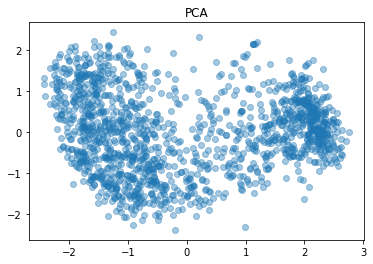

Train on 1460 samples
Epoch 1/50
1460/1460 [==============================] - 1s 661us/sample - loss: 0.0916
Epoch 2/50
1460/1460 [==============================] - 0s 41us/sample - loss: 0.0552
Epoch 3/50
1460/1460 [==============================] - 0s 41us/sample - loss: 0.0550
Epoch 4/50
1460/1460 [==============================] - 0s 42us/sample - loss: 0.0548
Epoch 5/50
1460/1460 [==============================] - 0s 44us/sample - loss: 0.0557
Epoch 6/50
1460/1460 [==============================] - 0s 41us/sample - loss: 0.0543
Epoch 7/50
1460/1460 [==============================] - 0s 38us/sample - loss: 0.0543
Epoch 8/50
1460/1460 [==============================] - 0s 41us/sample - loss: 0.0509
Epoch 9/50
1460/1460 [==============================] - 0s 39us/sample - loss: 0.0474
Epoch 10/50
1460/1460 [==============================] - 0s 37us/sample - loss: 0.0466
Epoch 11/50
1460/1460 [==============================] - 0s 40us/sample - loss: 0.0463
Epoch 12/50
1460/1460 [======

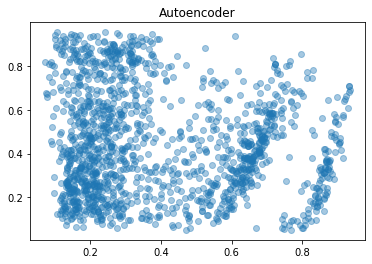

In [4]:
encoded_pca = pca_encoder(data_matrix, 2) # encode data to 2 dimensional space

autoencoder, encoder, encoded_ac = housing_encoder(data_matrix, 2) # encode data to 2 dimensional space

***
### Plot the encodings

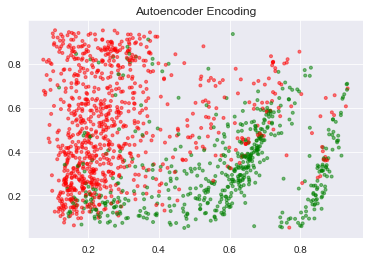

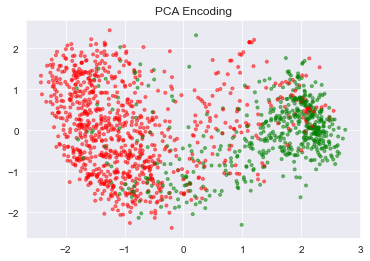

In [5]:
plots(encoded_pca, encoded_ac)